In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn import metrics
from sklearn import datasets

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split

In [2]:
warnings.simplefilter(action = "ignore", category = FutureWarning)

### Задание 1

Загрузим данные и проведём первичный анализ

In [3]:
boston = datasets.load_boston()

In [4]:
data = pd.DataFrame(boston.data, columns = boston.feature_names)
data["PRICE"] = boston.target

In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


<AxesSubplot:>

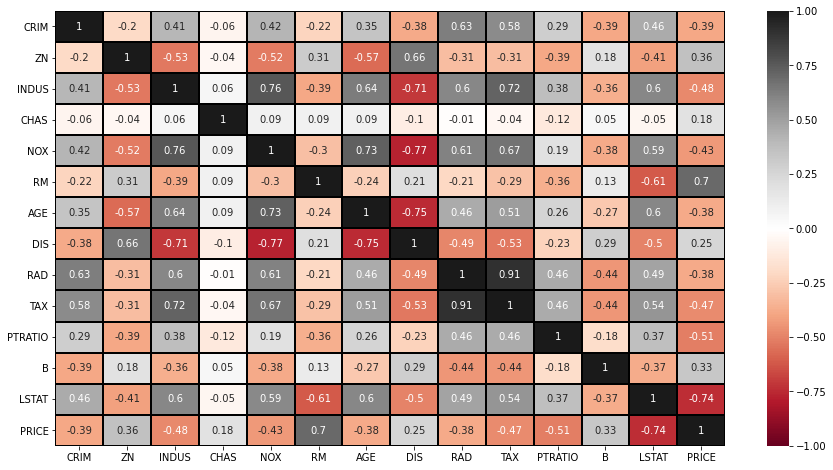

In [8]:
plt.subplots(figsize = (15, 8))
sns.heatmap(data.corr().round(2), annot = True, vmin = -1, vmax = 1, center = 0, 
            cmap = "RdGy", linewidth = 1, linecolor = "black")

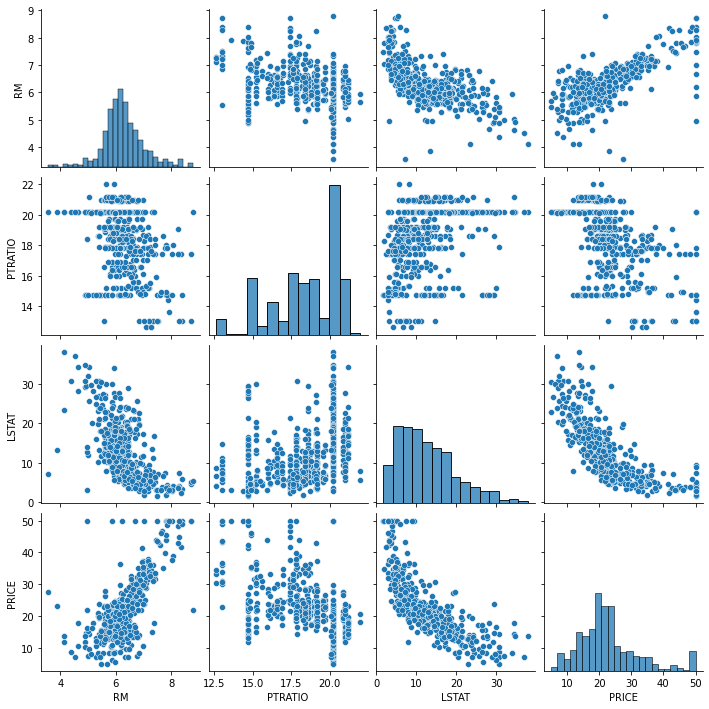

In [9]:
sns.pairplot(data, vars = ["RM", "PTRATIO", "LSTAT", "PRICE"])

Из приведенных выше таблиц и графиков можно сделать вывод, что нулевые и аномальные значения отсутствуют. Также можно заметить положительную корреляцию между RM и PRICE, и отрицательную - LSTAT и PRICE.

In [10]:
X = data[["RM", "LSTAT"]]
Y = data["PRICE"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

#### Линейная регрессия

In [11]:
model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)

LinearRegression()

In [12]:
predictions_lr = model_lr.predict(X_test)

In [13]:
print("Train Score:", round(model_lr.score(X_train, Y_train), 4))
print("Test Score:", round(model_lr.score(X_test, Y_test), 4), end = "\n\n")

print("MAE:", round(metrics.mean_absolute_error(Y_test, predictions_lr), 4))
print("RME:", round(metrics.mean_squared_error(Y_test, predictions_lr), 4))
print("RMSE:", round(np.sqrt(metrics.mean_squared_error(Y_test, predictions_lr)), 4))

Train Score: 0.633
Test Score: 0.6466

MAE: 4.1926
RME: 29.1003
RMSE: 5.3945


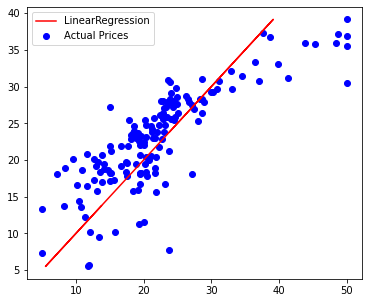

In [14]:
b = model_lr.intercept_
w = model_lr.coef_

plt.figure(figsize = (6, 5))

plt.plot(predictions_lr, b + np.sum(w * X_test, axis = 1), color = "red", label = "LinearRegression")
plt.scatter(Y_test, predictions_lr, color = "blue", label = "Actual Prices")

plt.legend()
plt.show()

#### Дерево решений

In [15]:
model_dtr = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 2, criterion = "mae")
model_dtr.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mae', max_depth=3, min_samples_leaf=2)

In [16]:
predictions_dtr = model_dtr.predict(X_test)

In [17]:
print("Train Score:", round(model_dtr.score(X_train, Y_train), 4))
print("Test Score:", round(model_dtr.score(X_test, Y_test), 4), end = "\n\n")

print("MAE:", round(metrics.mean_absolute_error(Y_test, predictions_dtr), 4))
print("RME:", round(metrics.mean_squared_error(Y_test, predictions_dtr), 4))
print("RMSE:", round(np.sqrt(metrics.mean_squared_error(Y_test, predictions_dtr)), 4))

Train Score: 0.7507
Test Score: 0.709

MAE: 3.3447
RME: 23.9602
RMSE: 4.8949


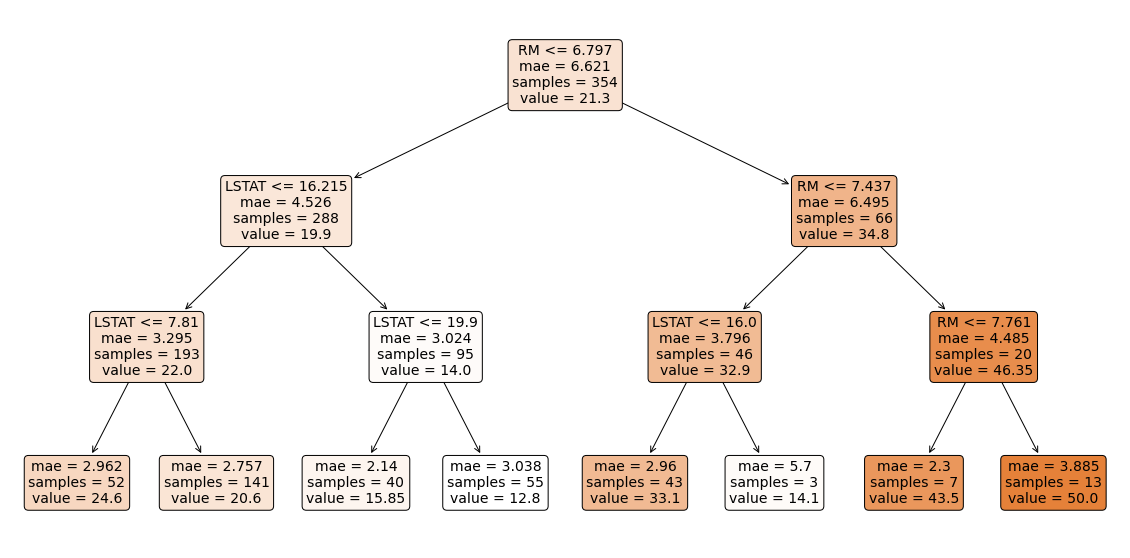

In [18]:
plt.figure(figsize = (20, 10))

stub = plot_tree(model_dtr, feature_names = X_test.columns, 
                 class_names = Y_test, filled = True, rounded = True, fontsize = 14)

#### Визуализируем сравнение двух моделей

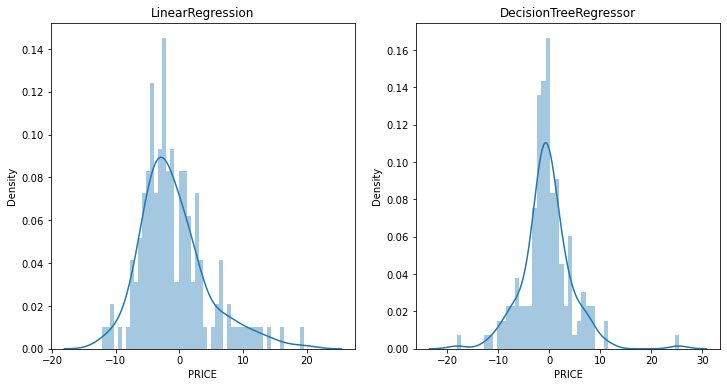

In [19]:
fig, (lr, dtr) = plt.subplots(1, 2, figsize = (12, 6))

sns.distplot((Y_test - predictions_lr), bins = 50, ax = lr)
sns.distplot((Y_test - predictions_dtr), bins = 50, ax = dtr)

lr.set_title("LinearRegression")
dtr.set_title("DecisionTreeRegressor")

plt.show()

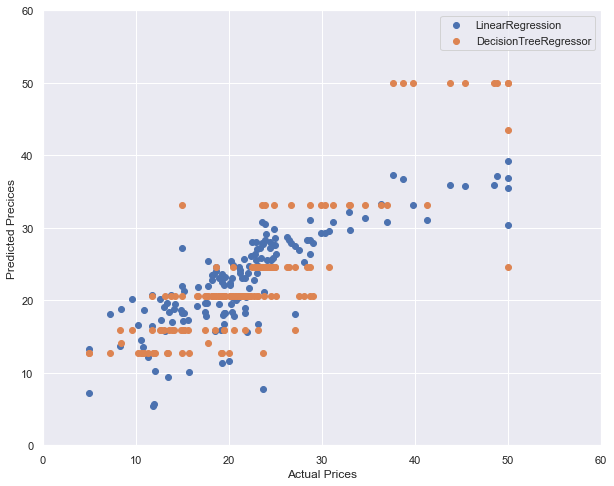

In [20]:
plt.figure(figsize = (10, 8))
sns.set()

plt.scatter(Y_test, predictions_lr, label = "LinearRegression")
plt.scatter(Y_test, predictions_dtr, label = "DecisionTreeRegressor")

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Precices")

plt.xlim(0, 60)
plt.ylim(0, 60)

plt.legend()
plt.show()